In [1]:
!pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5886 sha256=f5fb47b9a673229f290ac5226db1e7bc9f25aecfbad1bb2cb744b95c3b957223
  Stored in directory: /root/.cache/pip/wheels/09/a1/04/08e2688d2562d8f9ff89e77c6ddfbf7268e07dae1a6f22455e
Successfully built python_speech_features


In [2]:
import os
import librosa
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import scipy.io.wavfile as wav
from tempfile import TemporaryFile
from sklearn.model_selection import train_test_split
from python_speech_features import mfcc
import random
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import pandas as pd
import tensorflow as tf
import pickle
import math
from tensorflow import keras
import scipy
from google.colab import drive
from collections import Counter
import json
import heapq
import re
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import collections

In [3]:
drive.mount('/content/drive',force_remount=True)
data_set = "/content/drive/MyDrive/Data/"

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Data/

/content/drive/.shortcut-targets-by-id/1eq_rM4aklOjAetBEz__QcIiTfxyYy_lR/Data


In [9]:
genres=os.listdir("/content/drive/MyDrive/Data/genres_original")

In [10]:
print(genres)

['disco', 'reggae', 'country', 'pop', 'classical', 'hiphop', 'rock', 'jazz', 'blues', 'metal']


In [11]:
file_length=[]
for genre in genres:
  print(len(os.listdir("/content/drive/MyDrive/Data/genres_original/"+genre)))
  file_length.append(len(os.listdir("/content/drive/MyDrive/Data/genres_original/"+genre)))

100
100
100
100
100
100
100
99
100
100


In [12]:
df = pd.DataFrame({'genre': np.array(genres), '# of samples': file_length})

In [13]:
df

,genre,# of samples
0,disco,100
1,reggae,100
2,country,100
3,pop,100
4,classical,100
5,hiphop,100
6,rock,100
7,jazz,99
8,blues,100
9,metal,100


In [ ]:
import seaborn as sns
# df.plot.bar()
# create a countplot using seaborn
# sns.set(style="darkgrid")
# sns.set_palette(['#00BFFF', '#FFD700', '#FF4500', '#2E8B57'])
# sns.set_style("whitegrid")
sns.catplot(x="genre", y="# of samples", kind='bar',data=df,height=5, aspect=2)
# set the axis labels
plt.xlabel("Genres")
plt.ylabel("# of samples")
plt.ylim(80, None)
# plt.title("Class Distribution")
# sns.despine(top=True, right=True)
plt.show()

In [ ]:
for genre in genres:
  os.mkdir("/content/drive/MyDrive/Data/Data_Augmented/"+genre)

In [ ]:
import soundfile as sf

In [ ]:
for genre in genres:
  for file in os.listdir('/content/drive/MyDrive/Data/genres_original/'+genre):
    audio, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/'+genre+'/'+file)
    print(sr)

  # Get number of samples for 10 seconds; replace 10 by any number
    buffer = 10 * sr

    samples_total = len(audio)
    print(samples_total)
    samples_wrote = 0
    counter = 1
    audio=audio[:buffer*10]
    while samples_wrote < samples_total:
      # block=[]
      #check if the buffer is not exceeding total samples 
      if buffer > (samples_total - samples_wrote):
        buffer = samples_total - samples_wrote

      block = audio[samples_wrote : (samples_wrote + buffer)]
      out_filename = '/content/drive/MyDrive/Data/Data_AugmentedV2/'+genre+'/'+file[:-4]+"_split_" + str(counter)
      print(len(block))
      if counter<=3:                          # 30 second divided by 10. Adjust the counter so that we dont get samples of 0 secs.
        sf.write(out_filename+'.wav', block, sr)
      else:
        break
      
      counter += 1
      samples_wrote += buffer


In [ ]:
# audio, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/rock/rock.00001.wav')
# print(sr)

# # Get number of samples for 2 seconds; replace 2 by any number
# buffer = 3 * sr

# samples_total = len(audio)
# print(samples_total)
# samples_wrote = 0
# counter = 1
# audio=audio[:buffer*10]
# while samples_wrote < samples_total:

#     #check if the buffer is not exceeding total samples 
#     if buffer > (samples_total - samples_wrote):
#         buffer = samples_total - samples_wrote

#     block = audio[samples_wrote : (samples_wrote + buffer)]
#     out_filename = '/content/drive/MyDrive/Data/genres_original/rock/metal.00005'+"_split_" + str(counter)
#     print(len(block))
#     if len(block)>0:
#     # Write 2 second segment
#       sf.write(out_filename+'.wav', block, sr)
#     # sf.write(out_filename+'.wav', reduced_noise, 48000, 'PCM_24')
#     # librosa.output.write_wav(out_filename, block, sr)
#     counter += 1
#     samples_wrote += buffer

In [10]:
len(os.listdir("/content/drive/MyDrive/Data/Data_AugmentedV2/disco"))

300

In [11]:
genres

['disco',
 'reggae',
 'country',
 'pop',
 'classical',
 'hiphop',
 'rock',
 'jazz',
 'blues',
 'metal']

In [12]:
file_length=[]
for genre in genres:
  file_length.append(len(os.listdir("/content/drive/MyDrive/Data/Data_AugmentedV2/"+genre)))

In [13]:
df = pd.DataFrame({'genre': np.array(genres), '# of samples': file_length})

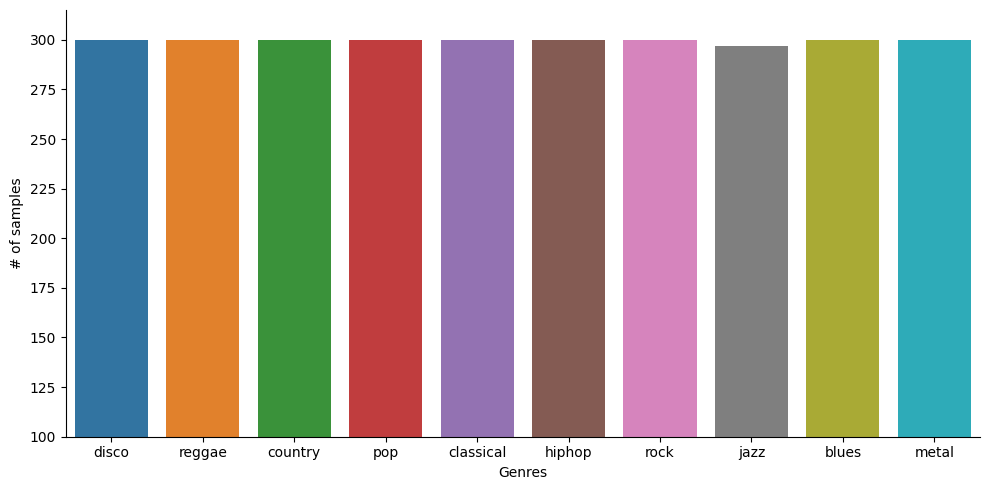

In [14]:
import seaborn as sns
# create a countplot using seaborn
# sns.set(style="darkgrid")
# sns.set_palette(['#00BFFF', '#FFD700', '#FF4500', '#2E8B57'])
# sns.set_style("whitegrid")
sns.catplot(x="genre", y="# of samples", kind='bar',data=df,height=5, aspect=2)
# set the axis labels
plt.xlabel("Genres")
plt.ylabel("# of samples")
plt.ylim(100, None)
# plt.title("Class Distribution")
# sns.despine(top=True, right=True)
plt.show()

In [ ]:
mfcc_cols_mean=['mfcc_'+str(i)+'_mean' for i in range(1,21)]
mfcc_cols_var=['mfcc_'+str(i)+'_var' for i in range(1,21)]
cols=mfcc_cols_mean+mfcc_cols_var+['spec_centroid_mean','spec_centroid_variance','spec_rolloff_mean','spec_rolloff_var','spectral bandwidth','tempo','rms_mean','genre']

In [ ]:
cols

['mfcc_1_mean',
 'mfcc_2_mean',
 'mfcc_3_mean',
 'mfcc_4_mean',
 'mfcc_5_mean',
 'mfcc_6_mean',
 'mfcc_7_mean',
 'mfcc_8_mean',
 'mfcc_9_mean',
 'mfcc_10_mean',
 'mfcc_11_mean',
 'mfcc_12_mean',
 'mfcc_13_mean',
 'mfcc_14_mean',
 'mfcc_15_mean',
 'mfcc_16_mean',
 'mfcc_17_mean',
 'mfcc_18_mean',
 'mfcc_19_mean',
 'mfcc_20_mean',
 'mfcc_1_var',
 'mfcc_2_var',
 'mfcc_3_var',
 'mfcc_4_var',
 'mfcc_5_var',
 'mfcc_6_var',
 'mfcc_7_var',
 'mfcc_8_var',
 'mfcc_9_var',
 'mfcc_10_var',
 'mfcc_11_var',
 'mfcc_12_var',
 'mfcc_13_var',
 'mfcc_14_var',
 'mfcc_15_var',
 'mfcc_16_var',
 'mfcc_17_var',
 'mfcc_18_var',
 'mfcc_19_var',
 'mfcc_20_var',
 'spec_centroid_mean',
 'spec_centroid_variance',
 'spec_rolloff_mean',
 'spec_rolloff_var',
 'spectral bandwidth',
 'tempo',
 'rms_mean',
 'genre']

In [ ]:
len(cols)

48

In [ ]:
file_path = "/content/drive/MyDrive/Data/Data_AugmentedV2/jazz/jazz.00099.wav_split_9.wav"
y, sr = librosa.load(file_path)
mfcc_features = librosa.feature.mfcc(y=y, sr=sr,n_mels=128, n_mfcc=20)
mfcc_mean = np.mean(mfcc_features, axis=1)
mfcc_variance=np.var(mfcc_features,axis=1)
print('mfcc_mean',mfcc_mean)
print('mfcc_var',mfcc_variance)
spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_centroid_mean=np.mean(spec_centroid,axis=1)
spec_centroid_var=np.var(spec_centroid,axis=1)
print('spec_centroid_mean',spec_centroid_mean)
print('spec_centroid_var',spec_centroid_var)
spec_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
spec_rolloff_mean=np.mean(spec_rolloff,axis=1)
spec_rolloff_var=np.var(spec_rolloff,axis=1)
print('spec_rolloff_mean',spec_rolloff_mean)
print('spec_rolloff_var',spec_rolloff_var)
#spectral bandwidth
spectral_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spectral_bw_mean=np.mean(spectral_bw,axis=1)
print("spectral_bandwidth",spectral_bw_mean)
#tempo
tempo = librosa.feature.rhythm.tempo(y=y, sr=sr)
#loudness
rms = librosa.feature.rms(y=y)
rms_mean=np.mean(rms,axis=1)
print("rms_mean",rms_mean)
X_vals_array=np.concatenate([mfcc_mean,mfcc_variance,spec_centroid_mean,spec_centroid_var,spec_rolloff_mean,spec_rolloff_var,spectral_bw_mean,tempo,rms_mean,[1]])
print('flat',X_vals_array)
# c_v = np.cov(mfcc_features)
# F_feat.append()

mfcc_mean [-3.1336569e+02  1.2919833e+02  9.3901386e+00  4.4763119e+01
  5.3494358e+00  2.1335802e+01 -6.0318189e+00  2.0041357e+01
 -1.4878763e+01  1.0427646e+01 -6.4591064e+00  4.4694991e+00
 -8.8590441e+00  1.5887131e-01 -4.2127218e+00 -8.7501585e-01
 -8.9732571e+00 -5.8643875e+00 -5.1607141e+00  5.8002591e-01]
mfcc_var [1309.0518    369.55475   196.29793    77.33827    52.670334   51.24227
   49.362026   42.701385   35.584488   38.84044    59.4955     26.90545
   29.329187   43.422108   35.924007   23.331753   31.713999   20.834787
   29.488852   60.28056 ]
spec_centroid_mean [1246.10424442]
spec_centroid_var [184929.89702917]
spec_rolloff_mean [2621.83312049]
spec_rolloff_var [1593127.78314476]
spectral_bandwidth [1831.22410847]
rms_mean [0.04169365]
flat [-3.13365692e+02  1.29198334e+02  9.39013863e+00  4.47631187e+01
  5.34943581e+00  2.13358021e+01 -6.03181887e+00  2.00413570e+01
 -1.48787632e+01  1.04276457e+01 -6.45910645e+00  4.46949911e+00
 -8.85904408e+00  1.58871308e-01 -

In [ ]:
len(cols)

48

In [ ]:
directory = "/content/drive/MyDrive/Data/Data_AugmentedV2"
F_feat = []

for z, genre in enumerate(genres, start=1):
    genre_d = os.path.join(directory, genre)
    for file in os.listdir(genre_d):
        if file.endswith(".wav"):
          file_path = os.path.join(genre_d, file)
          y, sr = librosa.load(file_path)
          mfcc_features = librosa.feature.mfcc(y=y, sr=sr,n_mels=128, n_mfcc=20)
          mfcc_mean = np.mean(mfcc_features, axis=1)
          mfcc_variance=np.var(mfcc_features,axis=1)
          # print('mfcc_mean',mfcc_mean)
          # print('mfcc_var',mfcc_variance)
          spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
          spec_centroid_mean=np.mean(spec_centroid,axis=1)
          spec_centroid_var=np.var(spec_centroid,axis=1)
          # print('spec_centroid_mean',spec_centroid_mean)
          # print('spec_centroid_var',spec_centroid_var)
          spec_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
          spec_rolloff_mean=np.mean(spec_rolloff,axis=1)
          spec_rolloff_var=np.var(spec_rolloff,axis=1)
          # print('spec_rolloff_mean',spec_rolloff_mean)
          # print('spec_rolloff_var',spec_rolloff_var)
          #spectral bandwidth
          spectral_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
          spectral_bw_mean=np.mean(spectral_bw,axis=1)
          # print("spectral_bandwidth",spectral_bw_mean)
          #temp0
          tempo = librosa.beat.tempo(y=y, sr=sr)
          # print("tempo",tempo)
          #loudness
          rms = librosa.feature.rms(y=y)
          rms_mean=np.mean(rms,axis=1)
          # print("rms_mean",rms_mean)
          X_vals_array=np.concatenate([mfcc_mean,mfcc_variance,spec_centroid_mean,spec_centroid_var,spec_rolloff_mean,spec_rolloff_var,spectral_bw_mean,tempo,rms_mean,[z]])
          # c_v = np.cov(mfcc_features)
          F_feat.append(X_vals_array)

df=pd.DataFrame(np.array(F_feat),columns=cols)


In [ ]:
df.shape

(9990, 48)

In [ ]:
df.to_csv('music_features.csv')

In [ ]:
df['genre'].unique()

array(['disco', 'reggae', 'country', 'pop', 'classical', 'hiphop', 'rock',
       'jazz', 'blues', 'metal'], dtype=object)

In [64]:
df=pd.read_csv('/content/drive/MyDrive/Data/music_features_10sec.csv',index_col=False)

In [65]:
df

,Unnamed: 0,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,...,mfcc_19_var,mfcc_20_var,spec_centroid_mean,spec_centroid_variance,spec_rolloff_mean,spec_rolloff_var,spectral bandwidth,tempo,rms_mean,genre
0,0,-26.166393,58.242699,-10.425974,19.860090,9.400514,19.972326,8.019683,8.191761,-0.227838,...,61.151001,67.762550,3132.153578,599983.625827,6253.746794,2.413039e+06,2710.681542,117.453835,0.185045,1.0
1,1,-30.846718,50.381737,-7.127524,24.216213,9.922525,17.269407,3.093051,3.816538,1.653293,...,65.770920,57.982464,3352.586678,575666.238210,6567.751856,2.058374e+06,2775.902392,117.453835,0.166827,1.0
2,2,-30.031282,47.380722,-5.324993,20.735268,5.107797,17.109568,9.528959,7.684742,0.733133,...,69.183044,102.081612,3385.349206,455430.781713,6716.585759,1.667521e+06,2811.060183,117.453835,0.178800,1.0
3,3,-107.571617,62.432266,15.108756,6.489589,4.294722,6.160264,2.574949,3.363928,-1.675476,...,62.049561,34.691467,3487.111821,845259.531629,7516.436838,2.487667e+06,3226.289483,123.046875,0.100204,1.0
4,4,-81.904701,68.731293,1.628685,-1.563210,-3.184977,6.813185,4.409182,4.361910,-4.370067,...,55.771046,39.236465,3150.077500,609694.345973,6851.205749,1.993637e+06,3024.141739,123.046875,0.120131,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,2992,-36.635155,96.041779,-36.086800,47.005646,-19.083965,20.710676,-11.363249,22.343679,-11.391633,...,37.856915,21.748386,2349.307574,188427.999807,4742.150907,9.693428e+05,2142.317528,161.499023,0.194716,10.0
2993,2993,-51.543404,92.566246,-11.080472,60.409721,-8.639405,27.175446,-11.813601,23.694099,-10.808640,...,30.068319,22.973669,2387.142347,676338.139173,4952.187069,1.580301e+06,2293.188541,161.499023,0.195759,10.0
2994,2994,-79.841385,86.854408,-31.068455,42.604511,-14.619045,25.868212,-12.330288,24.222828,-10.098413,...,94.726357,68.561623,2443.913744,503049.649659,4949.813921,1.552292e+06,2205.068832,143.554688,0.155610,10.0
2995,2995,-60.626938,88.976364,-27.342455,57.755955,-6.783169,28.629953,-6.876606,27.381920,-7.374969,...,31.716204,18.585651,2351.500788,210862.872106,4873.773236,6.275002e+05,2240.100029,151.999081,0.174838,10.0


In [66]:
df=df.iloc[:,1:]

In [67]:
df.describe()

,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,...,mfcc_19_var,mfcc_20_var,spec_centroid_mean,spec_centroid_variance,spec_rolloff_mean,spec_rolloff_var,spectral bandwidth,tempo,rms_mean,genre
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,...,2997.000000,2997.000000,2997.000000,2.997000e+03,2997.000000,2.997000e+03,2997.000000,2997.000000,2997.000000,2997.000000
mean,-145.035365,100.179849,-9.449853,36.741245,-1.542988,14.980838,-5.443711,10.408792,-7.258528,7.972502,...,62.610185,65.893378,2202.429324,4.496740e+05,4572.811665,1.759214e+06,2243.109200,121.121184,0.130697,5.497497
std,103.483240,32.819700,22.695000,17.069517,12.779859,12.161047,10.381835,10.715148,8.721684,8.291932,...,40.880528,47.297912,729.478880,4.143769e+05,1600.509534,1.455008e+06,533.301991,20.842109,0.066963,2.873108
min,-641.564026,-3.250568,-96.176956,-26.329733,-42.271309,-30.422886,-35.437805,-33.480228,-34.035717,-17.371851,...,11.670247,0.528655,518.949680,2.389426e+03,713.768228,1.260120e+03,695.900448,61.523438,0.001251,1.000000
25%,-201.927826,76.605659,-25.263832,24.326176,-10.595468,5.458475,-13.639789,2.087038,-13.823023,1.609324,...,37.338886,37.315002,1642.976531,1.587910e+05,3387.657474,7.057572e+05,1893.795199,103.359375,0.085237,3.000000
50%,-120.391640,98.224594,-11.244622,37.319221,-0.788321,15.175303,-5.640686,10.156769,-7.698047,7.653004,...,51.760159,53.387337,2221.041548,3.169764e+05,4664.511470,1.336523e+06,2226.766155,117.453835,0.121509,5.000000
75%,-70.605629,121.106895,5.681273,49.050644,7.861368,24.618402,2.767098,19.238413,-0.552629,14.766555,...,75.467621,78.797989,2702.854269,5.957698e+05,5574.751441,2.420049e+06,2590.672532,135.999178,0.175791,8.000000
max,106.943062,233.001633,64.326019,83.337151,36.859047,49.285900,24.245962,51.326118,23.484531,37.845589,...,560.703064,712.592102,5430.693426,3.347463e+06,9388.726368,9.884046e+06,3668.873197,184.570312,0.428984,10.000000


<Figure size 2000x2000 with 0 Axes>

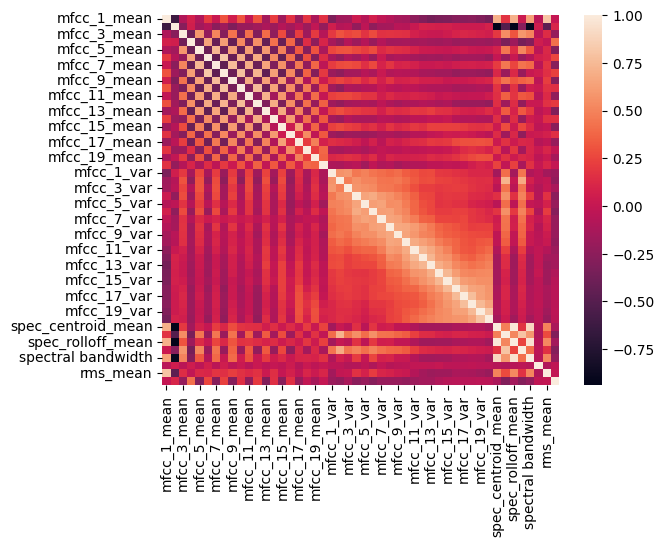

<Figure size 2000x2000 with 0 Axes>

In [68]:
sns.heatmap(df.corr());
plt.figure(figsize=(20, 20))

In [69]:
df.corr()

,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,...,mfcc_19_var,mfcc_20_var,spec_centroid_mean,spec_centroid_variance,spec_rolloff_mean,spec_rolloff_var,spectral bandwidth,tempo,rms_mean,genre
mfcc_1_mean,1.000000,-0.625801,-0.091741,0.075403,-0.095529,0.198455,0.021267,0.298539,0.058354,0.308706,...,-0.303540,-0.353843,0.703661,0.170224,0.705821,0.029507,0.631906,-0.044629,0.802234,-0.000317
mfcc_2_mean,-0.625801,1.000000,-0.273458,0.056659,-0.156269,-0.078854,-0.259299,-0.176210,-0.308847,-0.198870,...,0.033004,0.081116,-0.936066,-0.516588,-0.929412,-0.268643,-0.893039,0.049123,-0.470613,0.104849
mfcc_3_mean,-0.091741,-0.273458,1.000000,-0.380916,0.590557,-0.223607,0.504118,-0.286574,0.426678,-0.324700,...,0.082406,0.058866,0.195142,0.545757,0.305323,0.581167,0.506762,-0.043997,0.140220,-0.214594
mfcc_4_mean,0.075403,0.056659,-0.380916,1.000000,-0.413586,0.649539,-0.418534,0.618515,-0.425791,0.521792,...,-0.175466,-0.188802,-0.154581,-0.332149,-0.173214,-0.348500,-0.292932,0.052869,-0.013687,0.413791
mfcc_5_mean,-0.095529,-0.156269,0.590557,-0.413586,1.000000,-0.401619,0.736519,-0.388656,0.630992,-0.423743,...,0.008459,0.020918,0.077908,0.447850,0.134678,0.515755,0.312517,-0.036430,0.118078,-0.285754
mfcc_6_mean,0.198455,-0.078854,-0.223607,0.649539,-0.401619,1.000000,-0.451413,0.813579,-0.417359,0.692749,...,-0.156697,-0.195484,-0.004155,-0.192902,0.015030,-0.189922,-0.080283,0.065586,0.101622,0.252718
mfcc_7_mean,0.021267,-0.259299,0.504118,-0.418534,0.736519,-0.451413,1.000000,-0.457552,0.759029,-0.401706,...,0.058101,0.070044,0.212993,0.447399,0.248552,0.431268,0.389215,-0.048560,0.176575,-0.283657
mfcc_8_mean,0.298539,-0.176210,-0.286574,0.618515,-0.388656,0.813579,-0.457552,1.000000,-0.400187,0.782019,...,-0.198606,-0.226573,0.111502,-0.188557,0.117180,-0.195572,0.012680,0.049189,0.159653,0.231886
mfcc_9_mean,0.058354,-0.308847,0.426678,-0.425791,0.630992,-0.417359,0.759029,-0.400187,1.000000,-0.351639,...,0.075888,0.094123,0.280444,0.425365,0.304591,0.360718,0.402017,-0.040326,0.218383,-0.283413
mfcc_10_mean,0.308706,-0.198870,-0.324700,0.521792,-0.423743,0.692749,-0.401706,0.782019,-0.351639,1.000000,...,-0.093177,-0.114311,0.171707,-0.156692,0.164883,-0.193683,0.048253,0.020869,0.166169,0.147632


In [70]:
# directory = "/content/drive/MyDrive/Data/genres_original/jazz/"
# file_name = "jazz.00054.wav"
# file_path = os.path.join(directory, file_name)

# if os.path.isfile(file_path):
#     os.remove(file_path)

In [71]:
# with open('aap.dat', 'rb') as f:
#     data_set = pickle.load(f)


# # train_set, test_set = train_test_split(data_set, test_size=0.24, random_state=42)
# df = pd.DataFrame(data_set)

# len(df)

In [72]:
# df.head()

In [73]:
# prediction_final = [max_near_class(all_the_Neighbors(train_set, test_set[j], 6)) for j in range(len(test_set))]
# test_final = [i[-1] for i in test_set]
# accuracy = accuracy_score(test_final, prediction_final)

# print(len(test_set))
# print(len(prediction_final))
# print(accuracy)

In [74]:
# test_final = [i[-1] for i in test_set]

# fa = np.array(test_final).ravel()
# fb= np.array(prediction_final).ravel()
# f1 = f1_score(fa, fb, average='weighted')

# print("F1 score:", f1)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
sc=StandardScaler()

In [77]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [78]:
X.shape

(2997, 47)

In [79]:
y=np.array(y)

In [80]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [81]:
y_onehot.shape

(2997, 10)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [83]:
sc.fit(X_train)

StandardScaler()

In [84]:
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [85]:
nearest_neighbors=[3,5,7]


# **KNN Analysis**

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [90]:
models=[]

In [91]:
X_train.shape

(2397, 47)

In [92]:
for i in nearest_neighbors:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,y_train)
  cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)
  # y_predict=knn.predict(X_test_scaled)
  dictionary={'neighbors':i,'cross validation score':np.mean(cv_scores)}
  models.append(dictionary)

In [93]:
models

[{'neighbors': 3, 'cross validation score': 0.7684989539748954},
 {'neighbors': 5, 'cross validation score': 0.6746251743375175},
 {'neighbors': 7, 'cross validation score': 0.6274860529986054}]

In [94]:
#With the model with best validation score

In [95]:
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
accuracy_score(y_test,knn_final.predict(X_test_scaled))

0.7983333333333333

In [57]:
def remove_features(data,threshold):
  cols=set()
  corr_matrix=data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        col=corr_matrix.columns[i]
        cols.add(col)
  return cols

In [58]:
print(remove_features(df,0.9))

{'spec_centroid_mean', 'spectral bandwidth', 'spec_rolloff_mean'}


In [59]:
to_remove_features=list(remove_features(df,0.9))

In [60]:
to_remove_features

['spec_centroid_mean', 'spectral bandwidth', 'spec_rolloff_mean']

In [51]:
df_dropped=df.drop(to_remove_features, axis=1, inplace=False)

In [52]:
df_dropped

,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,...,mfcc_16_var,mfcc_17_var,mfcc_18_var,mfcc_19_var,mfcc_20_var,spec_centroid_variance,spec_rolloff_var,tempo,rms_mean,genre
0,-50.301060,65.000832,-15.586596,24.151360,13.733433,8.283072,1.318434,13.421028,-2.529228,11.713534,...,103.381210,65.673302,98.324867,95.062164,84.405876,417062.205343,1.635365e+06,112.347147,0.190589,1.0
1,-31.750597,60.736282,24.139956,31.241039,2.136519,5.373133,-3.185429,1.179479,-4.283859,0.793397,...,22.756746,18.913548,44.256218,93.736984,92.435242,221725.834161,5.823030e+05,123.046875,0.179193,1.0
2,-75.035294,96.889786,-42.266544,32.801384,-23.849682,20.555601,-29.976791,23.691111,-23.748465,15.762050,...,29.441832,48.471481,29.826180,44.424931,47.280510,499815.142321,1.175147e+06,123.046875,0.118242,1.0
3,-156.329910,122.741257,-14.707937,48.038506,-11.606613,24.119202,-16.624624,24.769871,-20.046635,15.317680,...,43.520218,38.693924,135.945343,182.889175,24.797258,85516.119569,4.817530e+05,89.102909,0.089028,1.0
4,-100.339287,112.030823,-15.294786,41.654755,-19.679712,25.494398,-24.541433,10.553091,-14.064342,12.947941,...,29.557539,27.536257,29.833553,34.739742,23.094280,242855.254115,7.679091e+05,107.666016,0.118233,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,-51.272564,81.513519,-28.653175,56.308151,-10.535997,31.130234,-8.098077,28.449253,-8.183613,18.036379,...,21.354086,30.253679,27.032948,24.049213,28.306810,267018.207486,7.402098e+05,151.999081,0.181989,10.0
9986,-67.479210,90.402092,-27.733786,59.436359,-6.250907,28.624653,-7.209579,28.954365,-7.872764,11.214681,...,23.298159,20.703903,23.013859,41.633972,13.235088,194784.980404,6.764114e+05,143.554688,0.162146,10.0
9987,-55.058533,87.346092,-19.927719,60.388882,-11.754799,32.260807,-4.894770,28.355043,-9.412861,15.756772,...,31.047123,29.478701,20.255312,29.456209,17.879181,209289.552741,5.193581e+05,143.554688,0.191495,10.0
9988,-67.971680,94.375000,-28.688089,60.258968,-4.179653,28.241579,-6.862749,27.944193,-6.532009,12.609269,...,18.727678,9.797893,15.926795,23.088692,16.794016,164558.120755,5.707942e+05,151.999081,0.163745,10.0


In [53]:
X=df_dropped.iloc[:,:-1]
y=df_dropped.iloc[:,-1]
y=np.array(y)
ohe = OneHotEncoder()
y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [54]:
X_train_scaled.shape

(7992, 44)

In [55]:
new_models=[]

In [56]:
for i in nearest_neighbors:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,y_train)
  cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)
  # y_predict=knn.predict(X_test_scaled)
  dictionary={'neighbors':i,'cross validation score':np.mean(cv_scores)}
  new_models.append(dictionary)

In [57]:
new_models

[{'neighbors': 3, 'cross validation score': 0.8221969649561952},
 {'neighbors': 5, 'cross validation score': 0.7815298811013767},
 {'neighbors': 7, 'cross validation score': 0.7462451501877347}]

In [58]:
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train_scaled,y_train)
accuracy_score(y_test,knn_final.predict(X_test_scaled))

0.8378378378378378

In [59]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y=np.array(y)
ohe = OneHotEncoder()
y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
print(X_train_scaled.shape)

(7992, 47)


In [60]:
X_test_scaled.shape

(1998, 47)

In [61]:
#Performing PCA

In [28]:
from sklearn.decomposition import PCA

In [63]:
# we will use n_components=47(number of original features to find out how many components capture most of the variance)

In [64]:
pca=PCA()
pca.fit(X_train_scaled)

PCA()

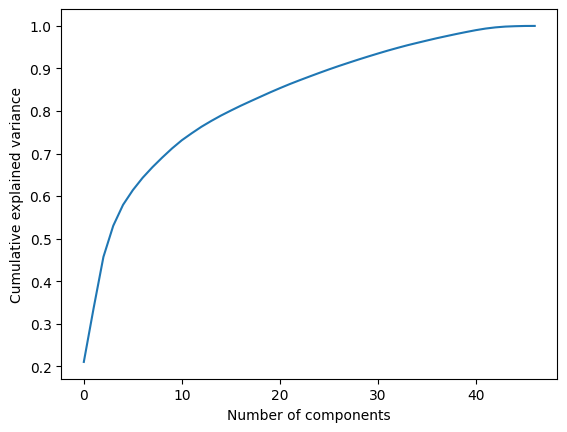

In [65]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [66]:
#we will use n=30

In [67]:
pca_30=PCA(n_components=30)
pca_30.fit(X_train_scaled)
X_pca_30_train=pca_30.transform(X_train_scaled)

In [68]:
X_pca_30_train.shape

(7992, 30)

In [69]:
X_pca_30_test=pca_30.transform(X_test_scaled)
X_pca_30_test.shape

(1998, 30)

In [70]:
new_models=[]

In [71]:
for i in nearest_neighbors:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_pca_30_train,y_train)
  cv_scores = cross_val_score(knn, X_pca_30_train, y_train, cv=10)
  # y_predict=knn.predict(X_test_scaled)
  dictionary={'neighbors':i,'cross validation score':np.mean(cv_scores)}
  new_models.append(dictionary)

In [72]:
new_models

[{'neighbors': 3, 'cross validation score': 0.7934202127659574},
 {'neighbors': 5, 'cross validation score': 0.7533789111389236},
 {'neighbors': 7, 'cross validation score': 0.7178421464330413}]

In [73]:
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_pca_30_train,y_train)
accuracy_score(y_test,knn_final.predict(X_pca_30_test))

0.8113113113113113

# **SVM ANALYSIS**

In [104]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y=np.array(y)
# ohe = OneHotEncoder()
# y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
print(X_train_scaled.shape)

(7992, 47)


In [105]:
# We will visualize our data for SVM Analysis

In [40]:
pca_2=PCA(n_components=2)
pca_2.fit(X_train_scaled)
X_pca_2_train=pca_2.transform(X_train_scaled)

In [41]:
X_pca_2_train.shape

(7992, 2)

In [42]:
np.unique(y_train)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

(-3.0, 3.0)

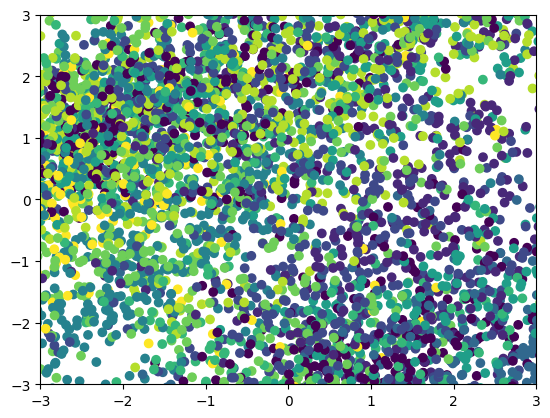

In [45]:
plt.scatter(X_pca_2_train[:,0],X_pca_2_train[:,1],c=y_train)
plt.xlim(-3, 3)  # Set the range for the x-axis
plt.ylim(-3, 3)  # Set the range for the y-axis

In [48]:
from sklearn.svm import SVC

In [106]:
Cs=[0.1,0.5,1,3,5,10]
kernels=["linear", "poly", "rbf", "sigmoid"]
degrees=[1,3,5]
models=[]
for c in Cs:
  for kernel in kernels:
      if kernel=='poly':
        for degree in degrees:
          print(c,kernel,degree)
          svc = SVC(C=c,kernel=kernel,degree=degree)
          # svc.fit(X_train_scaled,y_train)
          cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)
          # y_predict=knn.predict(X_test_scaled)
          dictionary={'c':c,'kernel':kernel,'degree':degree,'cross validation score':np.mean(cv_scores)}
          models.append(dictionary)
      else:
        print(c,kernel)
        svc = SVC(C=c,kernel=kernel)
        # svc.fit(X_train_scaled,y_train)
        cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)
        # y_predict=knn.predict(X_test_scaled)
        dictionary={'c':c,'kernel':kernel,'cross validation score':np.mean(cv_scores)}
        models.append(dictionary)

0.1 linear
0.1 poly 1
0.1 poly 3
0.1 poly 5
0.1 rbf
0.1 sigmoid
0.5 linear
0.5 poly 1
0.5 poly 3
0.5 poly 5
0.5 rbf
0.5 sigmoid
1 linear
1 poly 1
1 poly 3
1 poly 5
1 rbf
1 sigmoid
3 linear
3 poly 1
3 poly 3
3 poly 5
3 rbf
3 sigmoid
5 linear
5 poly 1
5 poly 3
5 poly 5
5 rbf
5 sigmoid
10 linear
10 poly 1
10 poly 3
10 poly 5
10 rbf
10 sigmoid


In [107]:
for model in models:
  print(model)

{'c': 0.1, 'kernel': 'linear', 'cross validation score': 0.6901905994124926}
{'c': 0.1, 'kernel': 'poly', 'degree': 1, 'cross validation score': 0.6143635610804938}
{'c': 0.1, 'kernel': 'poly', 'degree': 3, 'cross validation score': 0.5411662952674583}
{'c': 0.1, 'kernel': 'poly', 'degree': 5, 'cross validation score': 0.3674953291364048}
{'c': 0.1, 'kernel': 'rbf', 'cross validation score': 0.654904230663564}
{'c': 0.1, 'kernel': 'sigmoid', 'cross validation score': 0.5491717680246024}
{'c': 0.5, 'kernel': 'linear', 'cross validation score': 0.6938186491713767}
{'c': 0.5, 'kernel': 'poly', 'degree': 1, 'cross validation score': 0.6727961233593274}
{'c': 0.5, 'kernel': 'poly', 'degree': 3, 'cross validation score': 0.711335307345564}
{'c': 0.5, 'kernel': 'poly', 'degree': 5, 'cross validation score': 0.53190628373021}
{'c': 0.5, 'kernel': 'rbf', 'cross validation score': 0.7607584840650563}
{'c': 0.5, 'kernel': 'sigmoid', 'cross validation score': 0.508884150842086}
{'c': 1, 'kernel': 

In [108]:
svm_final = SVC(C=10,kernel="rbf")
svm_final.fit(X_train_scaled,y_train)

SVC(C=10)

In [109]:
accuracy_score(y_test,svm_final.predict(X_test_scaled))

0.8913913913913913

In [110]:
df_dropped=df.drop(to_remove_features, axis=1, inplace=False)
X=df_dropped.iloc[:,:-1]
y=df_dropped.iloc[:,-1]
y=np.array(y)
# ohe = OneHotEncoder()
# y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [111]:
X_train_scaled.shape

(7992, 44)

In [112]:
X_test_scaled.shape

(1998, 44)

In [113]:
models=[]
for c in Cs:
  for kernel in kernels:
      if kernel=='poly':
        for degree in degrees:
          print(c,kernel,degree)
          svc = SVC(C=c,kernel=kernel,degree=degree)
          # svc.fit(X_train_scaled,y_train)
          cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)
          # y_predict=knn.predict(X_test_scaled)
          dictionary={'c':c,'kernel':kernel,'degree':degree,'cross validation score':np.mean(cv_scores)}
          models.append(dictionary)
      else:
        print(c,kernel)
        svc = SVC(C=c,kernel=kernel)
        # svc.fit(X_train_scaled,y_train)
        cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)
        # y_predict=knn.predict(X_test_scaled)
        dictionary={'c':c,'kernel':kernel,'cross validation score':np.mean(cv_scores)}
        models.append(dictionary)

0.1 linear
0.1 poly 1
0.1 poly 3
0.1 poly 5
0.1 rbf
0.1 sigmoid
0.5 linear
0.5 poly 1
0.5 poly 3
0.5 poly 5
0.5 rbf
0.5 sigmoid
1 linear
1 poly 1
1 poly 3
1 poly 5
1 rbf
1 sigmoid
3 linear
3 poly 1
3 poly 3
3 poly 5
3 rbf
3 sigmoid
5 linear
5 poly 1
5 poly 3
5 poly 5
5 rbf
5 sigmoid
10 linear
10 poly 1
10 poly 3
10 poly 5
10 rbf
10 sigmoid


In [114]:
for model in models:
  print(model)

{'c': 0.1, 'kernel': 'linear', 'cross validation score': 0.6853108286546427}
{'c': 0.1, 'kernel': 'poly', 'degree': 1, 'cross validation score': 0.6216208346737361}
{'c': 0.1, 'kernel': 'poly', 'degree': 3, 'cross validation score': 0.5445456758408923}
{'c': 0.1, 'kernel': 'poly', 'degree': 5, 'cross validation score': 0.32169558414559785}
{'c': 0.1, 'kernel': 'rbf', 'cross validation score': 0.6559050908695282}
{'c': 0.1, 'kernel': 'sigmoid', 'cross validation score': 0.5555538074876272}
{'c': 0.5, 'kernel': 'linear', 'cross validation score': 0.6850617681107012}
{'c': 0.5, 'kernel': 'poly', 'degree': 1, 'cross validation score': 0.6712945590994371}
{'c': 0.5, 'kernel': 'poly', 'degree': 3, 'cross validation score': 0.704078346839115}
{'c': 0.5, 'kernel': 'poly', 'degree': 5, 'cross validation score': 0.5095091503528879}
{'c': 0.5, 'kernel': 'rbf', 'cross validation score': 0.7570044168719342}
{'c': 0.5, 'kernel': 'sigmoid', 'cross validation score': 0.5085093859506997}
{'c': 1, 'kern

In [115]:
svm_final = SVC(C=10,kernel="rbf")
svm_final.fit(X_train_scaled,y_train)

SVC(C=10)

In [116]:
accuracy_score(y_test,svm_final.predict(X_test_scaled))

0.8848848848848849

In [117]:
pca_30=PCA(n_components=30)
pca_30.fit(X_train_scaled)
X_pca_30_train=pca_30.transform(X_train_scaled)
X_pca_30_test=pca_30.transform(X_test_scaled)
X_pca_30_test.shape

(1998, 30)

In [118]:
models=[]
for c in Cs:
  for kernel in kernels:
      if kernel=='poly':
        for degree in degrees:
          print(c,kernel,degree)
          svc = SVC(C=c,kernel=kernel,degree=degree)
          # svc.fit(X_pca_30_train,y_train)
          cv_scores = cross_val_score(svc, X_pca_30_train, y_train, cv=5)
          # y_predict=knn.predict(X_test_scaled)
          dictionary={'c':c,'kernel':kernel,'degree':degree,'cross validation score':np.mean(cv_scores)}
          models.append(dictionary)
      else:
        print(c,kernel)
        svc = SVC(C=c,kernel=kernel)
        # svc.fit(X_pca_30_train,y_train)
        cv_scores = cross_val_score(svc, X_pca_30_train, y_train, cv=5)
        # y_predict=knn.predict(X_test_scaled)
        dictionary={'c':c,'kernel':kernel,'cross validation score':np.mean(cv_scores)}
        models.append(dictionary)

0.1 linear
0.1 poly 1
0.1 poly 3
0.1 poly 5
0.1 rbf
0.1 sigmoid
0.5 linear
0.5 poly 1
0.5 poly 3
0.5 poly 5
0.5 rbf
0.5 sigmoid
1 linear
1 poly 1
1 poly 3
1 poly 5
1 rbf
1 sigmoid
3 linear
3 poly 1
3 poly 3
3 poly 5
3 rbf
3 sigmoid
5 linear
5 poly 1
5 poly 3
5 poly 5
5 rbf
5 sigmoid
10 linear
10 poly 1
10 poly 3
10 poly 5
10 rbf
10 sigmoid


In [119]:
for model in models:
  print(model)

{'c': 0.1, 'kernel': 'linear', 'cross validation score': 0.6413907002264401}
{'c': 0.1, 'kernel': 'poly', 'degree': 1, 'cross validation score': 0.5919658798012838}
{'c': 0.1, 'kernel': 'poly', 'degree': 3, 'cross validation score': 0.5349112124990509}
{'c': 0.1, 'kernel': 'poly', 'degree': 5, 'cross validation score': 0.3397147466227719}
{'c': 0.1, 'kernel': 'rbf', 'cross validation score': 0.6356359301534674}
{'c': 0.1, 'kernel': 'sigmoid', 'cross validation score': 0.5226465070080566}
{'c': 0.5, 'kernel': 'linear', 'cross validation score': 0.6417657782046194}
{'c': 0.5, 'kernel': 'poly', 'degree': 1, 'cross validation score': 0.6337570180361475}
{'c': 0.5, 'kernel': 'poly', 'degree': 3, 'cross validation score': 0.6741738617925315}
{'c': 0.5, 'kernel': 'poly', 'degree': 5, 'cross validation score': 0.5116357923952783}
{'c': 0.5, 'kernel': 'rbf', 'cross validation score': 0.722720943393125}
{'c': 0.5, 'kernel': 'sigmoid', 'cross validation score': 0.4679693425412159}
{'c': 1, 'kerne

In [120]:
svm_final = SVC(C=10,kernel="rbf")
svm_final.fit(X_pca_30_train,y_train)

SVC(C=10)

In [121]:
accuracy_score(y_test,svm_final.predict(X_pca_30_test))

0.8413413413413413

# **Random Forest Analysis**

In [122]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y=np.array(y)
# ohe = OneHotEncoder()
# y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
print(X_train_scaled.shape)

(7992, 47)


In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
n_estimators=[5,10,20,100,150,200]
max_depths=[10,20,50,100]
models=[]
for n in n_estimators:
  for max_depth in max_depths: 
    rf = RandomForestClassifier(n_estimators=n,max_depth=max_depth)
    cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
    # y_predict=knn.predict(X_test_scaled)
    dictionary={'n_estimator':n,'max_depth':max_depth,'cross validation score':np.mean(cv_scores)}
    models.append(dictionary)

In [125]:
for model in models:
  print(model)

{'n_estimator': 5, 'max_depth': 10, 'cross validation score': 0.6156151255360633}
{'n_estimator': 5, 'max_depth': 20, 'cross validation score': 0.6356370259572434}
{'n_estimator': 5, 'max_depth': 50, 'cross validation score': 0.6381403114117787}
{'n_estimator': 5, 'max_depth': 100, 'cross validation score': 0.6333825662315544}
{'n_estimator': 10, 'max_depth': 10, 'cross validation score': 0.6750502699982233}
{'n_estimator': 10, 'max_depth': 20, 'cross validation score': 0.6963205257353431}
{'n_estimator': 10, 'max_depth': 50, 'cross validation score': 0.7044552250663548}
{'n_estimator': 10, 'max_depth': 100, 'cross validation score': 0.7015793663279851}
{'n_estimator': 20, 'max_depth': 10, 'cross validation score': 0.7157178180042126}
{'n_estimator': 20, 'max_depth': 20, 'cross validation score': 0.7540014448955503}
{'n_estimator': 20, 'max_depth': 50, 'cross validation score': 0.7468724586157963}
{'n_estimator': 20, 'max_depth': 100, 'cross validation score': 0.7566320784031947}
{'n_e

In [130]:
rf_final=RandomForestClassifier(n_estimators=200,max_depth=20)
rf_final.fit( X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [131]:
accuracy_score(y_test,rf_final.predict(X_test_scaled))

0.8273273273273273

In [132]:
df_dropped=df.drop(to_remove_features, axis=1, inplace=False)
X=df_dropped.iloc[:,:-1]
y=df_dropped.iloc[:,-1]
y=np.array(y)
# ohe = OneHotEncoder()
# y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [133]:
X_train_scaled.shape

(7992, 44)

In [135]:
models=[]
for n in n_estimators:
  for max_depth in max_depths: 
    rf = RandomForestClassifier(n_estimators=n,max_depth=max_depth)
    cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
    # y_predict=knn.predict(X_test_scaled)
    dictionary={'n_estimator':n,'max_depth':max_depth,'cross validation score':np.mean(cv_scores)}
    models.append(dictionary)

In [136]:
for model in models:
  print(model)

{'n_estimator': 5, 'max_depth': 10, 'cross validation score': 0.6204989664222242}
{'n_estimator': 5, 'max_depth': 20, 'cross validation score': 0.6147392652322595}
{'n_estimator': 5, 'max_depth': 50, 'cross validation score': 0.6158666125026515}
{'n_estimator': 5, 'max_depth': 100, 'cross validation score': 0.6184923931650023}
{'n_estimator': 10, 'max_depth': 10, 'cross validation score': 0.670919011491068}
{'n_estimator': 10, 'max_depth': 20, 'cross validation score': 0.6915681813023001}
{'n_estimator': 10, 'max_depth': 50, 'cross validation score': 0.6941957622137116}
{'n_estimator': 10, 'max_depth': 100, 'cross validation score': 0.7008260795036948}
{'n_estimator': 20, 'max_depth': 10, 'cross validation score': 0.717092895199675}
{'n_estimator': 20, 'max_depth': 20, 'cross validation score': 0.7545062973494854}
{'n_estimator': 20, 'max_depth': 50, 'cross validation score': 0.7551302010565114}
{'n_estimator': 20, 'max_depth': 100, 'cross validation score': 0.7493765267873146}
{'n_est

In [137]:
rf_final=RandomForestClassifier(n_estimators=200,max_depth=50)
rf_final.fit( X_train_scaled, y_train)

RandomForestClassifier(max_depth=50, n_estimators=200)

In [138]:
accuracy_score(y_test,rf_final.predict(X_test_scaled))

0.8368368368368369

In [139]:
pca_30=PCA(n_components=30)
pca_30.fit(X_train_scaled)
X_pca_30_train=pca_30.transform(X_train_scaled)
X_pca_30_test=pca_30.transform(X_test_scaled)
X_pca_30_test.shape

(1998, 30)

In [140]:
models=[]
for n in n_estimators:
  for max_depth in max_depths: 
    rf = RandomForestClassifier(n_estimators=n,max_depth=max_depth)
    cv_scores = cross_val_score(rf, X_pca_30_train, y_train, cv=5)
    # y_predict=knn.predict(X_test_scaled)
    dictionary={'n_estimator':n,'max_depth':max_depth,'cross validation score':np.mean(cv_scores)}
    models.append(dictionary)

In [141]:
for model in models:
  print(model)

{'n_estimator': 5, 'max_depth': 10, 'cross validation score': 0.5390386356929902}
{'n_estimator': 5, 'max_depth': 20, 'cross validation score': 0.5360365247052875}
{'n_estimator': 5, 'max_depth': 50, 'cross validation score': 0.5376640281277175}
{'n_estimator': 5, 'max_depth': 100, 'cross validation score': 0.5296542504271678}
{'n_estimator': 10, 'max_depth': 10, 'cross validation score': 0.5903404114430091}
{'n_estimator': 10, 'max_depth': 20, 'cross validation score': 0.6177462290652558}
{'n_estimator': 10, 'max_depth': 50, 'cross validation score': 0.6118621541467172}
{'n_estimator': 10, 'max_depth': 100, 'cross validation score': 0.6086110608867713}
{'n_estimator': 20, 'max_depth': 10, 'cross validation score': 0.6411416396824986}
{'n_estimator': 20, 'max_depth': 20, 'cross validation score': 0.671547063598103}
{'n_estimator': 20, 'max_depth': 50, 'cross validation score': 0.6744222961628865}
{'n_estimator': 20, 'max_depth': 100, 'cross validation score': 0.6712965941635926}
{'n_es

In [142]:
rf_final=RandomForestClassifier(n_estimators=200,max_depth=100)
rf_final.fit( X_pca_30_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=200)

In [143]:
accuracy_score(y_test,rf_final.predict(X_pca_30_test))

0.7682682682682682

# **Manifold Learning**

In [30]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [17]:
#KNNs

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [51]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y=np.array(y)
y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
components=[1,2,3]
models=[]
for i in components:
  # print(i)
  tsne = TSNE(n_components=i)
  X_train_embedded=tsne.fit_transform(X_train_scaled)
  knn = KNeighborsClassifier(n_neighbors=3)
  # knn.fit(X_train_scaled,y_train)
  print(X_train_embedded)
  cv_scores = cross_val_score(knn, X_train_embedded, y_train, cv=5)
  # y_predict=knn.predict(X_test_scaled)
  dictionary={'n_components':i,'cross validation score':np.mean(cv_scores)}
  models.append(dictionary)

[[-40.510757]
 [ 33.06012 ]
 [ 32.26124 ]
 ...
 [ 44.87145 ]
 [-49.501144]
 [-46.99458 ]]
[[-61.29652   -13.758401 ]
 [ 38.695362  -16.107485 ]
 [ 57.60864    10.099948 ]
 ...
 [ 77.61945   -19.322126 ]
 [-48.56953     2.7782357]
 [-20.609234   58.32491  ]]
[[-17.775404   -4.2558513 -19.069544 ]
 [ 29.789       5.613508    4.3351374]
 [ 17.693563   -1.1085236  15.7874775]
 ...
 [ 25.399502  -11.999009   14.149832 ]
 [ -9.945247   15.596409  -12.384148 ]
 [-20.419657    3.8684373   6.584128 ]]


In [53]:
for i in models:
  print(i)

{'n_components': 1, 'cross validation score': 0.5974717458737118}
{'n_components': 2, 'cross validation score': 0.8363355225927345}
{'n_components': 3, 'cross validation score': 0.8435926396425801}


In [58]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
components=[1,2,3]
models=[]
for i in components:
  # print(i)
  tsne = TSNE(n_components=i)
  X_train_embedded=tsne.fit_transform(X_train_scaled)
  svc = SVC(C=10,kernel='rbf')
  # knn.fit(X_train_scaled,y_train)
  # print(X_train_embedded)
  cv_scores = cross_val_score(svc, X_train_embedded, y_train, cv=5)
  # y_predict=knn.predict(X_test_scaled)
  dictionary={'n_components':i,'cross validation score':np.mean(cv_scores)}
  models.append(dictionary)

In [59]:
for i in models:
  print(i)

{'n_components': 1, 'cross validation score': 0.4398155605701623}
{'n_components': 2, 'cross validation score': 0.5815813387747818}
{'n_components': 3, 'cross validation score': 0.6435168726386407}


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
components=[1,2,3]
models=[]
for i in components:
  # print(i)
  tsne = TSNE(n_components=i)
  X_train_embedded=tsne.fit_transform(X_train_scaled)
  rf = RandomForestClassifier(n_estimators=200,max_depth=50)
  cv_scores = cross_val_score(rf, X_train_embedded, y_train, cv=5)
  # y_predict=knn.predict(X_test_scaled)
  dictionary={'n_components':i,'cross validation score':np.mean(cv_scores)}
  models.append(dictionary)

In [63]:
for i in models:
  print(i)

{'n_components': 1, 'cross validation score': 0.5920915841487288}
{'n_components': 2, 'cross validation score': 0.8667408682366403}
{'n_components': 3, 'cross validation score': 0.868115710617008}
